In [53]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import time 
import pandas as pd
from pandas.plotting import scatter_matrix
import copy, datetime, os, sys
import collections
from collections import Counter


from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold


from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings

import glob
import json
plt.rcParams['font.family'] = ['Hiragino Sans', 'Meiryo', 'MS Gothic']


In [72]:
#　教師データの作成
# agoopデータに関する真値のあるdirを読み込み
true_val_dir = '/Users/osamu/study/sakagami/sakagami_processsing/true_data'
true_val_files = sorted(glob.glob(os.path.join(true_val_dir,'*.json')))
true_val_files

with open(true_val_files[0]) as f:
    temp_true_data = json.load(f)
temp_true_data

# 時間帯（6:00 - 11:00）
time_slots = ['6:00', '7:00', '8:00', '9:00', '10:00', '11:00']

tf = open("../data/trans_prob_mat_element.json", "r")
trans_prob_mat_element = json.load(tf)
trans_prob_mat_element

#空の行列を作成 (時間帯 x メッシュIDカテゴリ)
num_categories = len(trans_prob_mat_element)  # 740
data_matrix = np.zeros((len(time_slots), num_categories))  # 6:00～11:00 と 740カテゴリ

# 各ファイルを処理
for idx, true_val_file in enumerate(true_val_files):
    with open(true_val_file) as f:
        temp_true_data = json.load(f)

    # 時間帯ごとにデータを埋め込む
    for category, category_idx in trans_prob_mat_element.items():
        if category in temp_true_data:
            # 各時間帯（6:00～11:00）に対応する滞在人数を取り出す
            data_matrix[idx, category_idx] = temp_true_data[category]

# DataFrame を作成
df_result = pd.DataFrame(data_matrix, columns=trans_prob_mat_element.keys(), index=time_slots)
df_result = df_result.astype(int)
df_result = df_result.T
pd.set_option("display.max_rows",None)
df_result


,6:00,7:00,8:00,9:00,10:00,11:00
53393462_販売・卸,0,0,0,0,0,0
53393462_自動車・オートバイ・自転車・ドライブ,0,0,0,0,0,2
53393462_学校・趣味教室・図書館,1,0,0,0,0,0
53393462_医療・薬・保険衛生,0,0,0,0,0,0
53393462_建設・工事,0,0,0,0,0,0
53393462_官公庁・団体・福祉,0,0,0,0,0,0
53393462_製造・加工,0,0,0,0,0,0
53393462_飲食店,0,0,0,0,0,5
53393462_交通・運輸・倉庫,0,0,0,0,0,0
53393462_不動産・賃貸・展示場,0,0,0,0,0,0


In [71]:
time_numeric = np.array([6, 7, 8, 9, 10]).reshape(-1, 1)
target_time = np.array([[11]])

predictions = {}
true_values = {}

# 各カテゴリ（行）ごとに線形モデルを作る
for meshid_poi in df_result.index:
    # 過去の滞在数（6〜10時）を取り出す
    y_series = df_result.loc[meshid_poi, ['6:00', '7:00', '8:00', '9:00', '10:00']].values
    
    # 線形回帰を使って学習
    model = LinearRegression()
    model.fit(time_numeric, y_series)
    
    # 11時の予測
    y_pred = model.predict(target_time)[0]
    predictions[meshid_poi] = y_pred
    
    # 真の11時の値も保存
    true_values[meshid_poi] = df_result.loc[meshid_poi, '11:00']


# DataFrame化
df_eval = pd.DataFrame({
    'True_11:00': pd.Series(true_values),
    'Pred_11:00': pd.Series(predictions).round().astype(int) 
})
df_eval['絶対誤差'] = (df_eval['True_11:00'] - df_eval['Pred_11:00']).abs()

# MSEの計算
mse = mean_squared_error(df_eval['True_11:00'], df_eval['Pred_11:00'])
rmse = np.sqrt(mse)

print(f'全メッシュカテゴリに対する 11:00 の RMSE（線形回帰）：{rmse:.3f}')

# 誤差が大きいカテゴリの上位を見る
print("誤差が大きいカテゴリ（上位5件）:")
print(df_eval.sort_values(by='絶対誤差', ascending=False).head())


全メッシュカテゴリに対する 11:00 の MSE（線形回帰）：142.812
誤差が大きいカテゴリ（上位5件）:
               True_11:00  Pred_11:00  絶対誤差
53393473_Home        1745         534  1211
53393483_Home        2685        1493  1192
53393485_Home        1838         701  1137
53393474_Home        1224         143  1081
53393482_Home        2007         938  1069


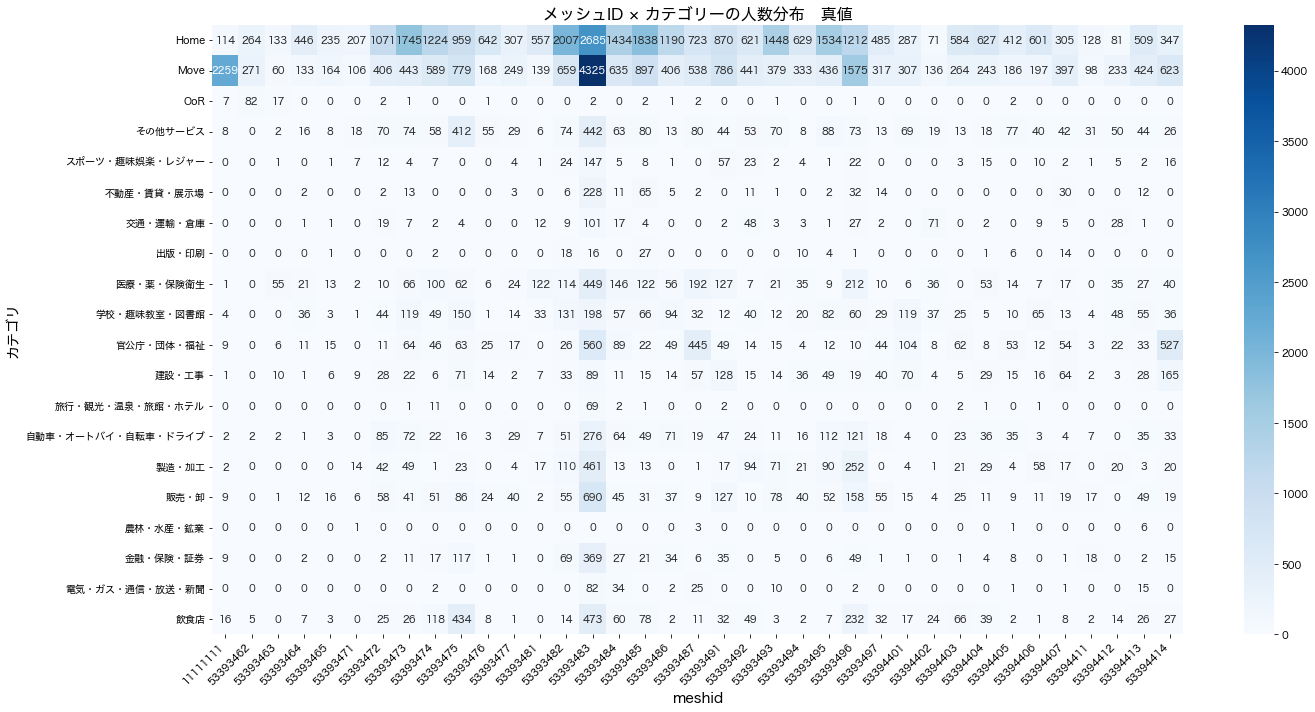

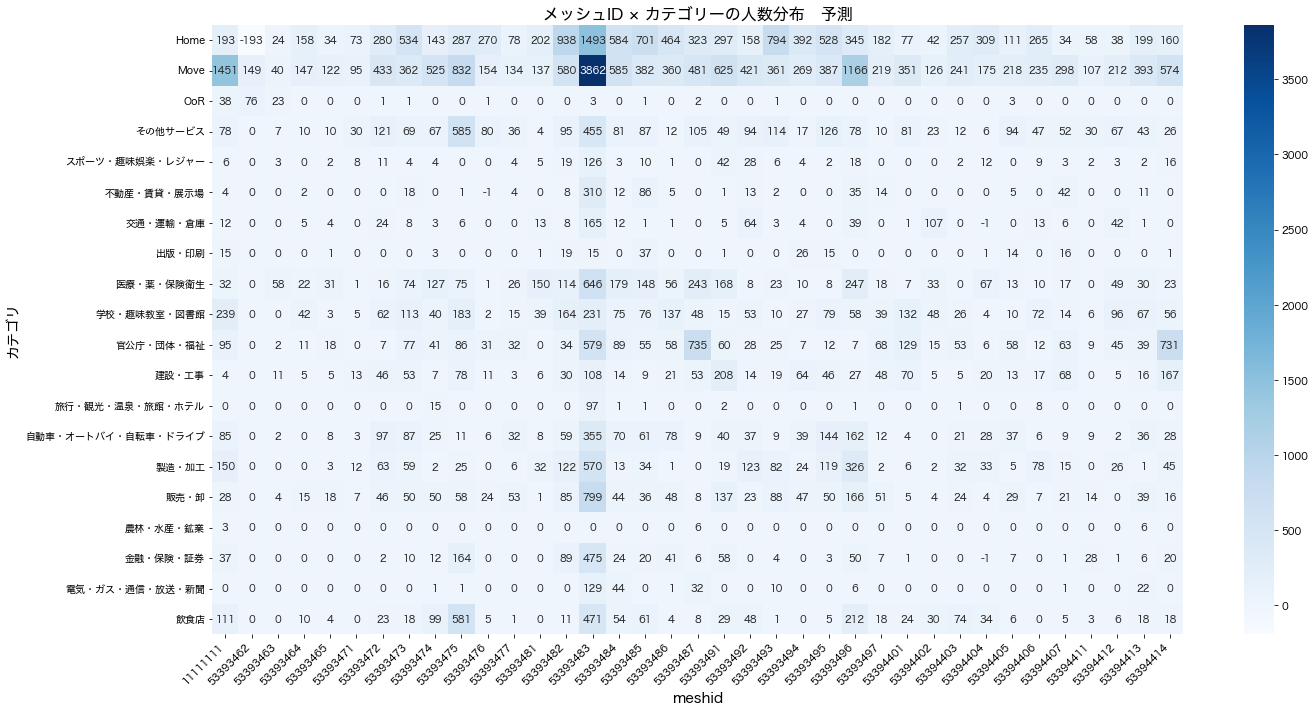

In [69]:
df_true = df_eval["True_11:00"]
df_pred = df_eval["Pred_11:00"]

df_true_split = df_true.rename_axis('meshid_poi').reset_index()
df_true_split[["meshid","poi"]] = df_true_split["meshid_poi"].str.split("_", n=1, expand=True)
df_true_split = df_true_split.pivot(index = "poi",columns ="meshid",values = "True_11:00")

df_pred_split = df_pred.rename_axis('meshid_poi').reset_index()
df_pred_split[["meshid","poi"]] = df_pred_split["meshid_poi"].str.split("_", n=1, expand=True)
df_pred_split = df_pred_split.pivot(index = "poi",columns ="meshid",values = "Pred_11:00")

plt.figure(figsize=(20, 10))
sns.heatmap(df_true_split,cmap="Blues", annot=True, fmt="d", cbar=True)
plt.xlabel("meshid", fontsize=14)
plt.ylabel("カテゴリ", fontsize=14)
plt.title("メッシュID × カテゴリーの人数分布　真値", fontsize=16)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))
sns.heatmap(df_pred_split,cmap="Blues", annot=True, fmt="d",   cbar=True)
plt.xlabel("meshid", fontsize=14)
plt.ylabel("カテゴリ", fontsize=14)
plt.title("メッシュID × カテゴリーの人数分布　予測", fontsize=16)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()